In [ ]:
# It is a project of Classification

In [1]:
import pandas as pd

In [ ]:
# Loading Data

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz


In [9]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
# As the data is categorial so it has to be converted with LabelEncoder to transfer to ordinal form

In [10]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [25]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [11]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [14]:
print("From the above table we can see that column veil type is having all the values as zero which means it is not contributing any  significant information in our data. So, it is better to remove it from the dataset.")

From the above table we can see that column veil type is having all the values as zero which means it is not contributing any  significant information in our data. So, it is better to remove it from the dataset.


In [ ]:
# Dropping the column veil type

In [15]:
df=df.drop(["veil-type"],axis=1)

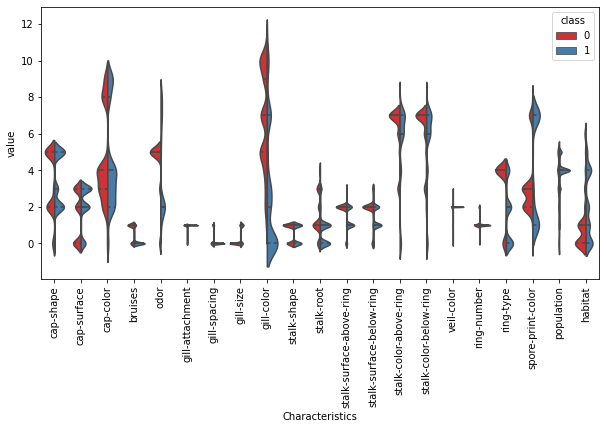

In [16]:
df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

In [19]:
print("The violin plot above represents the distribution of the classification characteristics of the data set. It can be seen that   gill-color property of the mushroom breaks into two parts, one below 3 and one above 3, that may contribute to the classification.")

The violin plot above represents the distribution of the classification characteristics of the data set. It can be seen that   gill-color property of the mushroom breaks into two parts, one below 3 and one above 3, that may contribute to the classification.


In [ ]:
# now, to check the balancedness of the data set

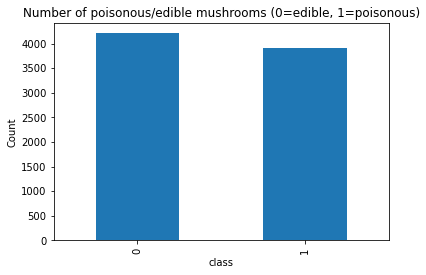

In [20]:
plt.figure()
pd.Series(df['class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("class")
plt.title('Number of poisonous/edible mushrooms (0=edible, 1=poisonous)');

In [21]:
print(" From above diagram we can see that data set is balanced.")

 From above diagram we can see that data set is balanced.


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

In [23]:
print('From info() we get the index dtype and column dtypes, non-null values, and memory usage of the dataframe.')

From info() we get the index dtype and column dtypes, non-null values, and memory usage of the dataframe.


In [26]:
df.shape

(8124, 22)

In [27]:
print('This shows that our dataset contains 8124 rows i.e. instances of mushrooms and 23 columns i.e. the specifications like cap-shape, cap-surface, etc.')

This shows that our dataset contains 8124 rows i.e. instances of mushrooms and 23 columns i.e. the specifications like cap-shape, cap-surface, etc.


In [28]:
df['class'].unique()

array([1, 0])

In [29]:
print('We can see, there are two unique values in the ‘class’ column of the dataset viz; poisonous=1, edible=0 ')

We can see, there are two unique values in the ‘class’ column of the dataset viz; poisonous=1, edible=0 


In [ ]:
# count of the unique occurrences of the class

In [30]:
df['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [31]:
print(" There are 4208 occurrences of edible mushrooms and 3916 occurrences of poisonous mushrooms in the dataset.")

 There are 4208 occurrences of edible mushrooms and 3916 occurrences of poisonous mushrooms in the dataset.


In [ ]:
# correlation between the variables

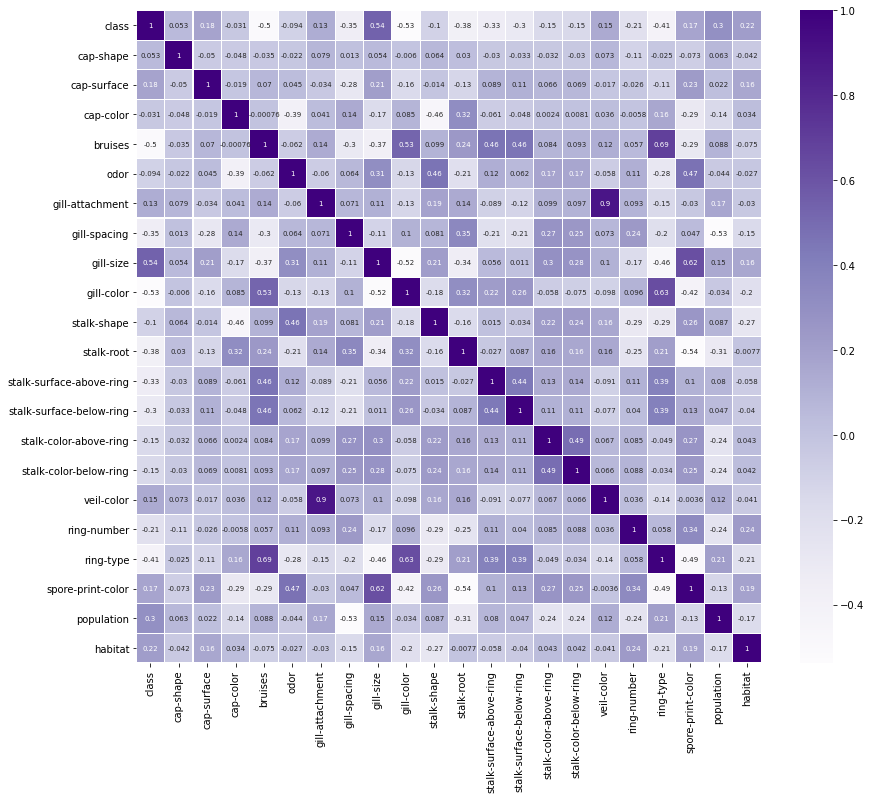

In [32]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

#plt.savefig("corr.png", format='png', dpi=400, bbox_inches='tight')

In [33]:
print("The least correlating variable is the most important for classification. Here, “gill-color” is -0.53 (least correlated)")

The least correlating variable is the most important for classification. Here, “gill-color” is -0.53 (least correlated)


In [34]:
df[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


C:\Users\Sadyo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


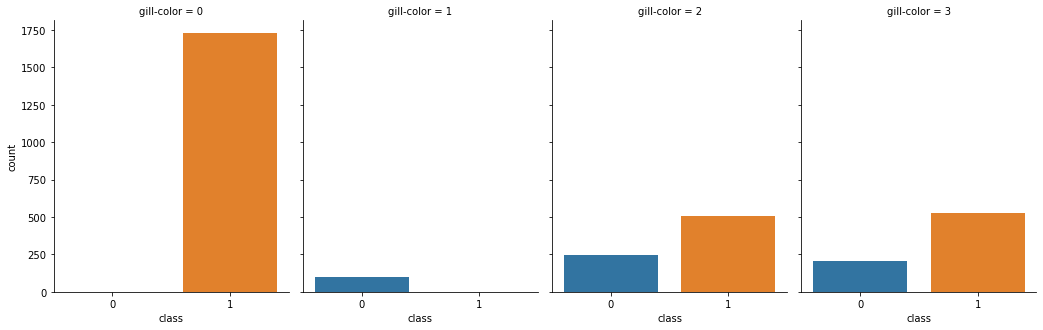

In [39]:
new_var = df[['class', 'gill-color']]
new_var = new_var[new_var['gill-color']<=3.5]
sns.catplot('class', col='gill-color', data=new_var, kind='count', height=4.5, aspect=.8, col_wrap=4);

#plt.savefig("gillcolor1.png", format='png', dpi=500, bbox_inches='tight')

C:\Users\Sadyo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


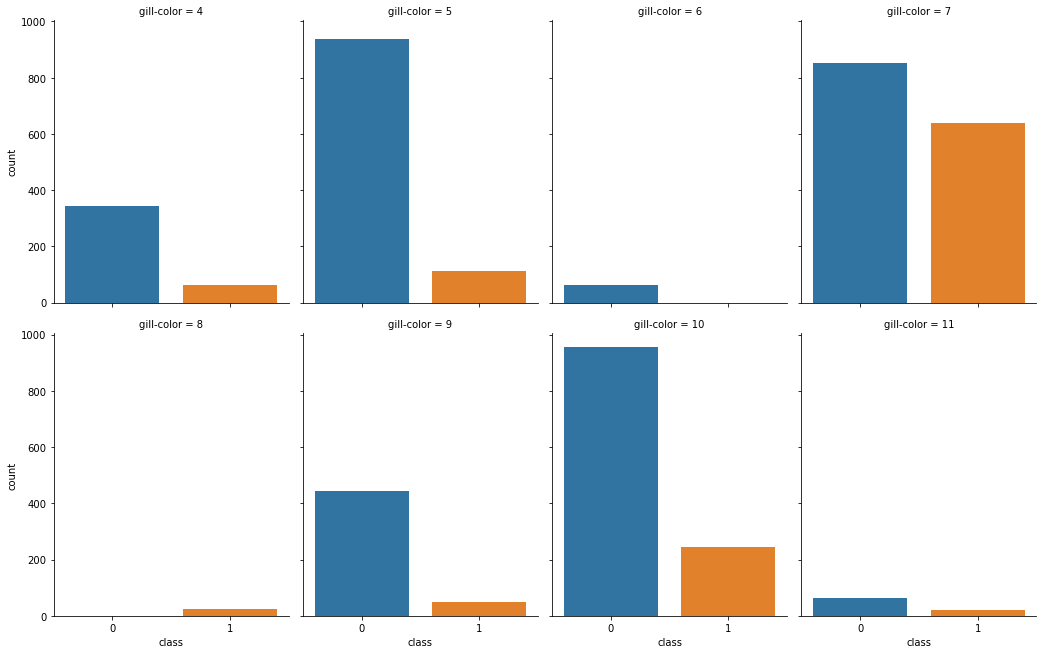

In [41]:
new_var=df[['class', 'gill-color']]
new_var=new_var[new_var['gill-color']>3.5]
sns.catplot('class', col='gill-color', data=new_var, kind='count', height=4.5, aspect=.8, col_wrap=4);

#plt.savefig("gillcolor2.png", format='png', dpi=400, bbox_inches='tight')

In [42]:
X=df.drop(['class'], axis=1)
Y=df['class']

In [43]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.1)

In [ ]:
# decision tree classifier

In [50]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

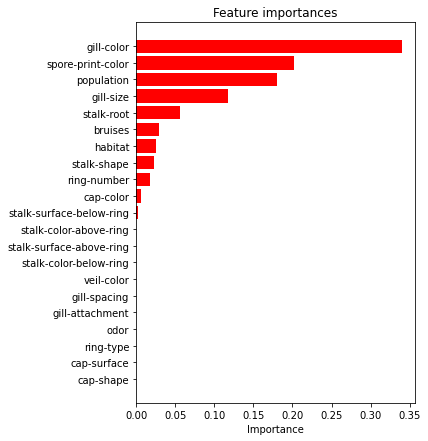

In [51]:
features_list = X.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(5,7))

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center',color ="red")

plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

In [54]:
y_pred=clf.predict(X_test)

In [55]:
print("Decision Tree Classifier report \n", classification_report(Y_test, y_pred))

Decision Tree Classifier report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       435
           1       1.00      1.00      1.00       378

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



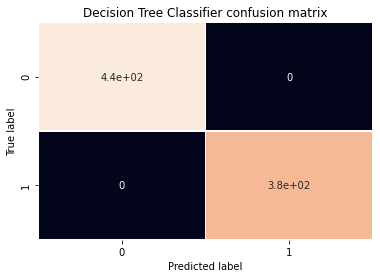

In [56]:
cfm=confusion_matrix(Y_test, y_pred)

sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [57]:
print("Test Accuracy: 100%")

Test Accuracy: 100%


In [66]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier


In [74]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, Y_train)
print("Test Accuracy: {}%".format(round(lr.score(X_test, Y_test)*100,2)))

Test Accuracy: 94.83%


In [71]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

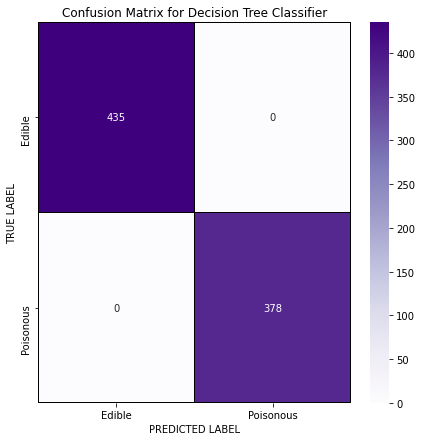

In [80]:
y_pred_clf = clf.predict(X_test)
cm = confusion_matrix(Y_test, y_pred_dt)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
# KNN Classification

In [83]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    if knn.score(X_test, Y_test) > best_score:
        best_score = knn.score(X_train, Y_train)
        best_Kvalue = i
        
print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


In [84]:
y_pred_knn = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(Y_test, y_pred_knn))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       435
           1       1.00      1.00      1.00       378

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



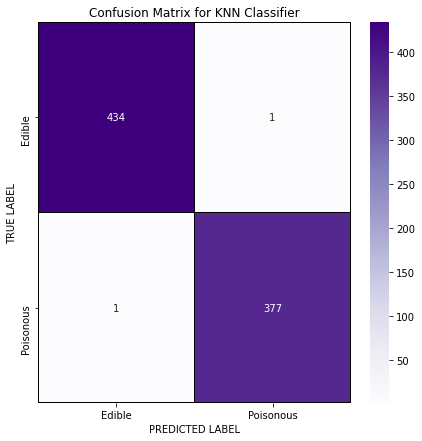

In [85]:
cm = confusion_matrix(Y_test, y_pred_knn)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
#plt.savefig("knncm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
# SVM Classification

In [86]:
from sklearn.svm import SVC
svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train, Y_train)
print("Test Accuracy: {}%".format(round(svm.score(X_test, Y_test)*100, 2)))

Test Accuracy: 100.0%


In [87]:
y_pred_svm = svm.predict(X_test)
print("SVM Classifier report: \n\n", classification_report(Y_test, y_pred_svm))

SVM Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       435
           1       1.00      1.00      1.00       378

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



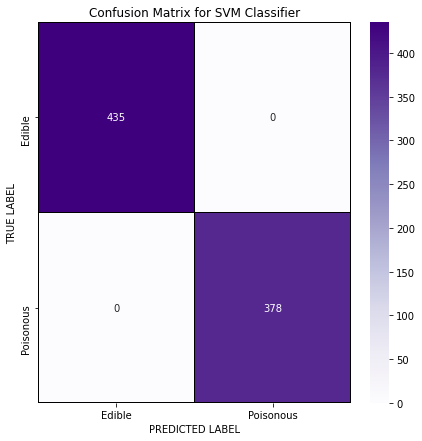

In [88]:
cm = confusion_matrix(Y_test, y_pred_svm)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for SVM Classifier')
#plt.savefig("svmcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
# Naive Bayes Classification

In [89]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)
print("Test Accuracy: {}%".format(round(nb.score(X_test, Y_test)*100, 2)))

Test Accuracy: 92.25%


In [90]:
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Classifier report: \n\n", classification_report(Y_test, y_pred_nb))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.94      0.91      0.93       435
           1       0.90      0.93      0.92       378

    accuracy                           0.92       813
   macro avg       0.92      0.92      0.92       813
weighted avg       0.92      0.92      0.92       813



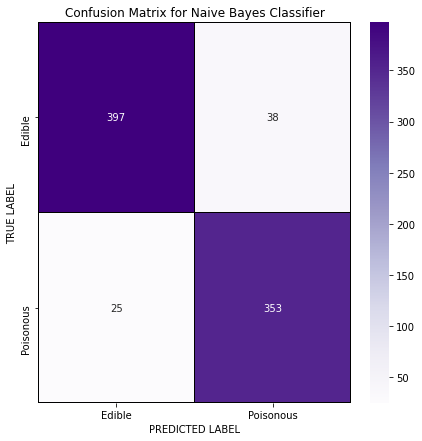

In [91]:
cm = confusion_matrix(Y_test, y_pred_nb)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
#plt.savefig("nbcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
# Random Forest Classification

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)
print("Test Accuracy: {}%".format(round(rf.score(X_test, Y_test)*100, 2)))

Test Accuracy: 100.0%


In [93]:
y_pred_rf = rf.predict(X_test)
print("Random Forest Classifier report: \n\n", classification_report(Y_test, y_pred_rf))

Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       435
           1       1.00      1.00      1.00       378

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



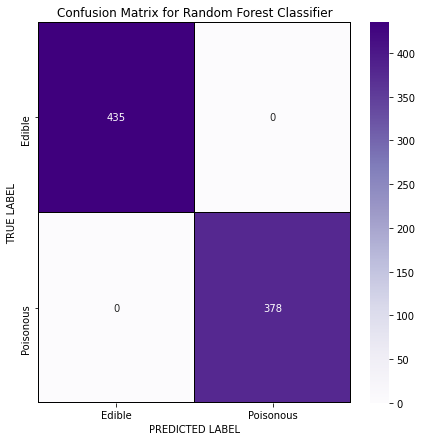

In [94]:
cm = confusion_matrix(Y_test, y_pred_rf)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier');
#plt.savefig("rfcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

In [95]:
preds = dt.predict(X_test)
print(preds[:36])
print(Y_test[:36].values)
# 0 - Edible
# 1 - Poisonous

[0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1]
[0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1]


In [96]:
print('predicted and the true values match 100%.')

predicted and the true values match 100%.
